<h1 style="padding-top: 25px;padding-bottom: 25px;text-align: left; padding-left: 10px; background-color: #DDDDDD; 
    color: black;"> <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science </h1>

## Homework 1: Data Collection - Web Scraping - Data Parsing

**Harvard University**<br/>
**Fall 2019**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner



<hr style='height:2px'>

In [1]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

/anaconda3/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


#### Instructions
- To submit your assignment follow the instructions given in Canvas.
- The deliverables to be submitted in Canvas are: <br/>
    a) this python notebook with your code and answers<br/>
    b) the bibtex file, `publist.bib`, you created<br/>
    c) the CSV file, `publist.csv`, you created <br/>
    d) The JSON file, `publist.json` you created<br/>
    
- Exercise **responsible scraping**. Web servers can become slow or unresponsive if they receive too many requests from the same source in a short amount of time. Use a delay of 10 seconds between requests in your code. This helps not to get blocked by the target website. Run the webpage fetching part of the homework only once and do not re-run after you have saved the results in the JSON file (details below). 
- Web scraping requests can take several minutes. This is another reason why you should not wait until the last minute to do this homework.



# Data Collection - Web Scraping - Data Parsing 
 

In this homework, your goal is to learn how to acquire, parse, clean, and analyze data. Initially you will read the data from a file, and then later scrape them directly from a website. You will look for specific pieces of information by parsing the data, clean the data to prepare them for analysis, and finally, answer some questions.

In doing so you will get more familiar with three of the common file formats for storing and transferring data, which are:
- CSV, a text-based file format used for storing tabular data that are separated by some delimiter, usually comma or space.
- HTML/XML.
- JavaScript Object Notation (JSON), a text-based open standard designed for transmitting structured data over the web.

In [2]:
# import the necessary libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns

## Help a professor parse their publications and extract information.

### Overview

In this part your goal is to parse the HTML page of a professor containing some of his/her publications, and answer some questions. This page is provided to you in the file `data/publist_super_clean.html`. There are 45 publications in descending order from No. 244 to No. 200.


In [3]:
# use this file 
PUB_FILENAME = 'data/publist_super_clean.html'

<div class='exercise'><b> Question 1 [40 pts]: Parsing and Converting to bibTex and CSV using Beautiful Soup and python string manipulation </b></div>

A lot of the bibliographic and publication information is displayed in various websites in a not-so-structured HTML files. Some publishers prefer to store and transmit this information in a .bibTex file which looks roughly like this (we've simplified a few things):
```
@article { 
     author = "John Doyle",
     title = "Interaction between atoms",
     URL = "Papers/PhysRevB_81_085406_2010.pdf",
     journal = "Phys. Rev. B",
     volume = "81"
}
```
You will notice that this file format is a set of items, each of which is a set of key-value pairs. In the python world, you can think of this as a list of dictionaries.
Each line is an item, and has multiple features, or keys, as represented by that line's value for the column corresponding to the key.

You are given an .html file containing a list of papers scraped from the author's website and you are to write the information into .bibTex and .CSV formats. A useful tool for parsing an .html file is BeautifulSoup  (http://www.crummy.com/software/BeautifulSoup/) (BS), which makes parsing HTML a lot easier.

**1.1 [5 pts]** Write a function called `make_soup` that accepts `filename` for the HTML filename as an input and returns a BS object.
    
**1.2 [25 pts]** Write a function that reads in the BS object, parses it, and converts it into a list of dictionaries.  Each element of this list should correspond to one paper and should have the following format (with different values for each publication):
```
{'author': 'L.A. Agapito, N. Kioussis and E. Kaxiras',
 'title': 'Electric-field control of magnetism in graphene quantum dots:\n Ab initio calculations',
 'URL': 'Papers/PhysRevB_82_201411_2010.pdf',
 'journal': 'Phys. Rev. B',
 'volume': '82'}
```


**1.3 [5 pts]** Convert the list of dictionaries into standard .bibTex format using python string manipulation, and write the results into a file called `publist.bib`.

**1.4 [5 pts]** Convert the list of dictionaries into standard tabular .csv format using pandas, and write the results into a file called `publist.csv`. The csv file should have a header and no integer index for the rows.

    
#### HINT 
- Inspect the HTML code for tags that indicate information chunks such as `title` of the paper.  The `find_all` method of BeautifulSoup might be useful.
- Question 1.2 is better handled if you break the code into functions, each performing a small task such as finding the author(s) for each paper. 
- Question 1.3 is effectively tackled by first using python string formatting on a template string.
- Make sure you catch exceptions when needed. 
- Make sure you check for **missing data** and handle these cases as you see fit. 


#### Resources
- [BeautifulSoup Tutorial](https://www.dataquest.io/blog/web-scraping-tutorial-python/).
- More about the [BibTex format](http://www.bibtex.org).<BR>
    
### Answers 

In [4]:
# import the necessary libraries 
from bs4 import BeautifulSoup

 **1.1 [5 pts]  Write a function called `make_soup` that accepts `filename` for the HTML filename as an input and returns a BS object.**
    

In [5]:
def make_soup(filename: str) -> BeautifulSoup: 
    '''Open the file and convert into a BS object. 
       
       Args:
           filename: A string name of the file.
       
       Returns:
           A BS object containing the HTML page ready to be parsed.
    '''
    
    my_soup = BeautifulSoup(open(filename), 'html.parser')
    return my_soup

   

In [6]:
# check your code - print the BS object, you should get a familiar HTML page as text
soup = make_soup("data/publist_super_clean.html")
print(soup)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<title>Kaxiras E journal publications</title>
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type">
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css">
<meta content="" name="description">
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords">
</meta></meta></link></meta></head>
<body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br>
</br></br></li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanopart

Your output should look **like** this:
```
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<title>Kaxiras E journal publications</title>
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head>
<body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  035325 (2011)
<br/>
</li>
</ol>

...

```

**1.2 [25 pts] Write a function that reads in the BS object, parses it, and converts it into a list of dictionaries.  Each element of this list should correspond to one paper and should have the following format (with different values for each publication):**
```
{'author': 'L.A. Agapito, N. Kioussis and E. Kaxiras',
 'title': 'Electric-field control of magnetism in graphene quantum dots:\n Ab initio calculations',
 'URL': 'Papers/PhysRevB_82_201411_2010.pdf',
 'journal': 'Phys. Rev. B',
 'volume': '82'}
```

In [7]:
def BS_parser(filename: str):
    """
    Function takes BS object and creates dictionary with elements
    of journal publications
    """
    import re

    author = []
    others = []
    URL = []
    journal = []
    volume = []
    title=[]
    
    soup = make_soup(filename)
    
    #Note: may want to optimize to remove extra for loops
    for j in soup.find_all("ol"):
        for x in j.find_all('a'):
            title.append(x.get_text())
            URL.append(x.get('href'))
            others.append(x.next_sibling.next_sibling)
        
        y = j.find("b")
        if y == None:
            volume.append("NA")
        else:
            volume.append(y.get_text())

        z = j.find_all("i")[-1]
        author.append(z.previous_sibling)
        journal.append(z.get_text())

    title = [item.replace("\n", "") for item in title]
    title = [item.replace('"', "") for item in title]

    author = [item.replace("\n", "") for item in author]
    journal = [item[:-1] for item in journal if item.endswith(" ")]

    soup_parsed=[]
    for a, b, c, d, e in zip(author, title, journal, volume, URL):
        thing = {
            "author":a,
            "title":b,
            "journal":c,
            "volume":d,
            "URL":e
        }
        soup_parsed.append(thing)
    
    return soup_parsed
    

In [8]:
Publist = BS_parser("data/publist_super_clean.html")

**1.3 [5 pts] Convert the list of dictionaries into standard .bibTex format using python string manipulation, and write the results into a file called `publist.bib`.**



In [9]:
def Bibtex_parser(Publist):
    """
    Per, https://bibtexparser.readthedocs.io/en/v0.5.4/tutorial.html
    
    Final Bibtex format:
        @article{Cesar2013,
          author = {Jean César},
          title = {An amazing title},
          volume = {12},
          journal = {Nice Journal},
          URL = Papers/2011/An Amazing Title.pdf
    }

    """
    import os
    
    articles = []
    for x,y in zip(Publist, range(len(Publist))):
        Publist[y].update({'year':x['URL'][7:11]})
        Publist[y].update({'first_author':(x['author'][0:x['author'].find(",")])})
        article = ["@article{{{},".format(Publist[y]['first_author']),os.linesep,
             "{{author = {}, \n".format(Publist[y]['author']),
             "title = {}, \n".format(Publist[y]['title']), 
             "URL = {}, \n".format(Publist[y]['URL']), 
             "journal = {}, \n".format(Publist[y]['journal']), 
             "volume = {} \n}}".format(Publist[y]['volume'])
        ]
        
        if y ==0:
            file1 = open("publist.bib","w") #write the file first time through to erase previous content
        else:
            file1 = open("publist.bib","a") #append to file once first article put into bib file
        
        ## Writing the file line by line
        
        file1.write("@article{{{},".format(Publist[y]['first_author']))
        file1.write("\n")
        file1.write("     {{author = {},".format(Publist[y]['author']))
        file1.write("\n")

        file1.write("     title = {},".format(Publist[y]['title']))
        file1.write("\n")

        file1.write("      URL = {},".format(Publist[y]['URL']))
        file1.write("\n")

        file1.write("      journal = {},".format(Publist[y]['journal']))
        file1.write("\n")
        file1.write("      volume = {}}}}}".format(Publist[y]['volume']))
        file1.write("\n\n")
    
    return "Done"

In [10]:
Bibtex_parser(Publist)

'Done'

**1.4 [5 pts] Convert the list of dictionaries into standard tabular .csv format using pandas, and write the results into a file called `publist.csv`. The csv file should have a header and no integer index.** 

In [11]:
df = pd.DataFrame(Publist)
df.to_csv("publist.csv", header=True, index=False)

<hr style='height:2px'>

## Follow the stars in IMDb's list of "The Top 100 Stars for 2017" 

### Overview
In this part, your goal is to extract information from IMDb's Top 100 Stars for 2017 (https://www.imdb.com/list/ls025814950/) and perform some analysis on each star in the list. In particular we are interested to know: 
+ how many performers made their first movie at age 17? 
+ how many performers started as child actors? 
+ who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2017? 

These questions are addressed in more details in the questions below. 



<div class='exercise'><b> Question 2 [60 pts]: Web Scraping using Beautiful Soup and exploring using Pandas </b></div>

**2.1 [5 pts]** Download the webpage of the "Top 100 Stars for 2017" (https://www.imdb.com/list/ls025814950/) into a `requests` object and name it `my_page`. Explain what the following attributes are (1 or 2 sentences for each):

- `my_page.text`, 
- `my_page.status_code`,
- `my_page.content`.

**2.2 [5 pts]** Create a Beautiful Soup object named `star_soup` using `my_page` as input.

**2.3 [15 pts]** Write a function called `parse_stars` that accepts `star_soup` as its input and generates a list of dictionaries named `starlist` (see definition below). The order of dictionaries does not matter. One of the fields of this dictionary is the `url` of each star's individual page, which you need to save in the `page` field. Note that there is a ton of information about each star on these webpages. Each dictionary corresponds to a star profile and it should have the following data:

```
name: the name of the actor/actress as it appears at the top
gender: 0 or 1: translate the word 'actress' into 1 and 'actor' into '0'
url: the url of the link under their name that leads to a page with details
page: BS object with html text acquired by scraping the above 'url' page' 
```


**2.4 [15 pts]** Write a function called `create_star_table`, which takes `starlist` as an input and extracts information about each star (see function definition for the exact information to be extracted and the exact output definition).  Only extract information from the first box on each star's page. If the first box is acting, consider only acting credits and the star's acting debut, if the first box is Directing, consider only directing credits and directorial debut.

   
**2.6 [10 pts]** We provide a JSON file called `data/staff_starinfo.json` created by CS109 teaching staff for consistency, which you should use for the rest of the homework. Import the contents of this JSON file  into a pandas dataframe called `frame`. Check the types of variables in each column and clean these variables if needed. Add a new column to your dataframe with the age of each actor when they made their first appearance, movie or TV, (name this column `age_at_first_movie`). Check some of the values of this new column. Do you find any problems? You don't need to fix them.

**2.7 [6 pts]** You are now ready to answer the following intriguing questions: 
- **2.7.1** How many performers made their first appearance (movie or TV) when he/she was 17 years old?

- **2.7.2** How many performers started as child actors? Define child actor as a person younger than 12 years old. 

**2.8 [2 pts]** Make a plot of the number of credits against the name of actor/actress. Who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2017? Define **most prolific** as the performer with the most credits.
    
**2.9 [2 pts]** In 4 or fewer sentences, comment on what you see in the plots above.  Are there any surprises or patterns?  Please **have some fun** with this question.
     
### Hints
- Create a variable that groups actors/actresses by the age of their first movie. Use pandas' `.groupby` to divide the dataframe into groups of performers that for example started performing as children (age $<$ 12). The grouped variable is a `GroupBy` pandas object and this object has all of the information needed to then apply operations to each of the groups.
- When cleaning the data make sure the variables with which you are performing calculations are in numerical format.
- The column with the year has some values that are double, e.g. **'2000-2001'** and the column with age has some empty cells. You need to deal with these in a reasonable fashion before performing calculations on the data. 
- You should include both movies and TV shows.
    
### Resources
- The `requests` library makes working with HTTP requests easy. For more on the `requests` library see http://docs.python-requests.org/

### Answers

In [12]:
import requests

**2.1 [5 pts] Download the webpage of the "Top 100 Stars for 2017" (https://www.imdb.com/list/ls025814950/) into a `requests` object and name it `my_page`. Explain what the following attributes are (1 or 2 sentences for each):**

- `my_page.text`, 
- `my_page.status_code`,
- `my_page.content`.


In [13]:
my_page = requests.get(
    "https://www.imdb.com/list/ls025814950/")
print(my_page.status_code) #200
#print(my_page.text) #prints whole output in byte format
#print(my_page.content) #prints whole output in unicode format

200


**Status code**: is 200 which means that the link works

**Text**: gets the HTML content of the request in unicode format. This is the "best-guess" of the response based upon the HTTP headers for the get request.

**Content**: gets the HTML content back in byte format (non-text).



**2.2 [5 pts] Create a Beautiful Soup object named `star_soup` using `my_page` as input.**


In [14]:
star_soup = BeautifulSoup(my_page.content, 'html.parser')

In [15]:
# check your code - you should see a familiar HTML code
# print (star_soup.prettify()[:])

**2.3 [15 pts] Write a function called `parse_stars` that accepts `star_soup` as its input and generates a list of dictionaries named `starlist` (see definition below)....**

```
Function
--------
parse_stars

Input
------
star_soup: the soup object with the scraped page
   
Returns
-------
a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    name: the name of the actor/actress as it appears at the top
    gender: 0 or 1: translate the word 'actress' into 1 and 'actor' into '0'
    url: the url of the link under their name that leads to a page with details
    page: BS object with 'html text acquired by scraping the above 'url' page' 

Example:
--------
{'name': Tom Hardy,
  'gender': 0,
  'url': https://www.imdb.com/name/nm0362766/?ref_=nmls_hd,
  'page': BS object with 'html text acquired by scraping the 'url' page'
}

```

In [16]:
def parse_stars(star_soup):
    stars = star_soup.find_all(class_="lister-item-content")

    dictlist = []
    
    for star in stars:
        gender_words = ["She","Her","actress","Actress"]
        gender_val=0
        if any(word in str(star.findAll("p")) for word in gender_words):
            gender_val = 1

        name_val = star.find("h3",class_="lister-item-header").get_text().strip()
        name_val = name_val[name_val.find("\n")+2:]
        href = star.find("h3", class_="lister-item-header").a.get("href")

        URL_val = "https://www.imdb.com"+href
        new_page = requests.get(URL_val)
        page_val = BeautifulSoup(new_page.content, 'html.parser')
        
        
        thing = {
                "name":name_val,
                "gender":gender_val,
                "url":URL_val,
                "page":page_val,
            }
        
        dictlist.append(thing)
    
    return dictlist 

In [17]:
starlist = parse_stars(star_soup)

This should give you 100

In [18]:
len(starlist)

100

Your output should look like this:
```
{'name': 'Gal Gadot',
 'gender': 1,
 'url': 'https://www.imdb.com/name/nm2933757?ref_=nmls_hd',
 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="app-id=342792525, app-argument=imdb:///name/nm2933757?src=mdot" name="apple-itunes-app"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 
... 


 ```

**2.4 [15 pts] Write a function called `create_star_table`, which takes `starlist` as an input and extracts information about each star (see function definition for the exact information to be extracted and the exact output definition).  Only extract information from the first box on each star's page. If the first box is acting, consider only acting credits and the star's acting debut, if the first box is Directing, consider only directing credits and directorial debut.**

```
Function
--------
create_star_table

Input
------
the starlist
   
Returns
-------

a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    star_name: the name of the actor/actress as it appears at the top
    gender: 0 or 1 (1 for 'actress' and 0 for 'actor')  
    year_born : year they were born
    first_movie: title of their first movie or TV show
    year_first_movie: the year they made their first movie or TV show
    credits: number of movies or TV shows they have made in their career.
    
--------
Example:

{'star_name': Tom Hardy,
  'gender': 0,
  'year_born': 1997,
  'first_movie' : 'Batman',
  'year_first_movie' : 2017,
  'credits' : 24}
  
```

In [19]:
def create_star_table(starlist: list) -> list:

    profession = []
    dictlist = []

    for x in star_soup.find_all(class_="lister-item-content"):
        acting = x.find("p", class_="text-muted text-small").get_text().strip().replace(" ","")
        job=str(acting[0:acting.find("|")]).lower()
        profession.append(job)
    
    for x in range(0,100):
        name_val = starlist[x]['name']
        #name_val = name_val[name_val.find("\n")+2:]
        gender_val = starlist[x]['gender']
        credits_val = starlist[x]['page'].find("a",{"name":profession[x]}).next_sibling[2:5].replace(" ","").replace("c","")         
        year_born_val = starlist[x]['page'].find("h4",{"class":"inline"}
                                                ).next_sibling.next_sibling.get_text().strip()[-4:]

        first_movie_val = str(starlist[x]['page']\
                        .find("div",{"class":"filmo-category-section"})\
                        .findAll("b")[-1]\
                        .find("a").contents)[2:-2]
        
        thing = {
            "name":name_val,
            "gender":gender_val,
            "year_born":year_born_val,
            "first_movie":first_movie_val,
            "credits":credits_val
            }
        
        dictlist.append(thing)

    return dictlist

In [20]:
star_table = create_star_table(starlist)

In [21]:
# check your code
# Flag: There is no birthday listed on Christain Navarro's IMDB page (that we saw..)
star_table[-3:]

[{'name': 'Shailene Woodley',
  'gender': 1,
  'year_born': '1991',
  'first_movie': 'Replacing Dad',
  'credits': '36'},
 {'name': 'Nina Dobrev',
  'gender': 1,
  'year_born': '1989',
  'first_movie': 'Playing House',
  'credits': '43'},
 {'name': 'Christian Navarro',
  'gender': 0,
  'year_born': 'enna',
  'first_movie': 'Law & Order: Criminal Intent',
  'credits': '13'}]

Your output should look like this (the order of elements is not important):
```
[{'name': 'Gal Gadot',
  'gender': 1,
  'year_born': '1985',
  'first_movie': 'Bubot',
  'year_first_movie': '2007',
  'credits': '25'},
 {'name': 'Tom Hardy',
  'gender': 0,
  'year_born': '1977',
  'first_movie': 'Tommaso',
  'year_first_movie': '2001',
  'credits': '55'},
  
...
```

**2.5 [4 pts] Now that you have scraped all the info you need, it's good practice to save the last data structure you created to disk. Save the data structure to a JSON file named `starinfo.json` and submit this JSON file in Canvas. If you do this, if you have to restart, you won't need to redo all the requests and parsings from before.**


In [22]:
# your code here
import json


with open('starinfo.json', 'w') as json_file:
    json.dump(star_table, json_file)


To check your JSON saving, re-open the JSON file and reload the code

In [23]:
with open("starinfo.json", "r") as fd:
    star_table = json.load(fd)
    
# output should be the same
star_table[-1]

{'name': 'Christian Navarro',
 'gender': 0,
 'year_born': 'enna',
 'first_movie': 'Law & Order: Criminal Intent',
 'credits': '13'}

**2.6 [10 pts] We provide a JSON file called `data/staff_starinfo.json` created by CS109 teaching staff for consistency, which you should use for the rest of the homework. Import the contents of this JSON file  into a pandas dataframe called `frame`. Check the types of variables in each column and clean these variables if needed. Add a new column to your dataframe with the age of each actor when they made their first appearance, movie or TV, (name this column `age_at_first_movie`). Check some of the values of this new column. Do you find any problems? You don't need to fix them.**

In [24]:
with open("data/staff_starinfo.json", "r") as fd:
    staff_star_table = json.load(fd)

In [25]:
staff_star_table[-1]

{'name': 'Christian Navarro',
 'gender': 0,
 'year_born': '1966',
 'first_movie': 'Law & Order: Criminal Intent',
 'year_first_movie': '2007',
 'credits': '12'}

In [26]:
for x in range(0,100):
    val = (int(staff_star_table[x]['year_first_movie'])-int(staff_star_table[x]['year_born']))
    star_table[x].update({'age_at_first_movie':val})

In [27]:
star_table[45:49]

[{'name': 'Yvonne Strahovski',
  'gender': 1,
  'year_born': '1982',
  'first_movie': 'Double the Fist',
  'credits': '37',
  'age_at_first_movie': 22},
 {'name': 'Jason Momoa',
  'gender': 0,
  'year_born': '1979',
  'first_movie': 'Baywatch',
  'credits': '31',
  'age_at_first_movie': 20},
 {'name': 'Lily James',
  'gender': 1,
  'year_born': '1989',
  'first_movie': 'Just William',
  'credits': '28',
  'age_at_first_movie': 21},
 {'name': 'Jodie Whittaker',
  'gender': 1,
  'year_born': '1982',
  'first_movie': 'The Afternoon Play',
  'credits': '53',
  'age_at_first_movie': 24}]

**Response**
I looked at 4 random stars and all seemed to align correctly with the staff table

**2.7 [6 pts] You are now ready to answer the following intriguing questions:**
- **2.7.1** How many performers made their first appearance (movie or TV) when he/she was 17 years old?
- **2.7.2** How many performers started as child actors? Define child actor as a person younger than 12 years old. 


In [28]:
y = 0
z=0
for x in range(0,100):
    if star_table[x]['age_at_first_movie']<18:
        y +=1
    if star_table[x]['age_at_first_movie']<12:
        z +=1

    

print("There are ", y, " performers that appeared before age 18") #43
print("There are ", z, " performers that appeared before age 12") #19

There are  43  performers that appeared before age 18
There are  19  performers that appeared before age 12



**2.8 [2 pts] Make a plot of the number of credits against the name of actor/actress. Who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2017? Define *most prolific* as the performer with the most credits.**

In [29]:
star_df = pd.DataFrame(star_table)
star_df.tail(44)

,age_at_first_movie,credits,first_movie,gender,name,year_born
56,21,89,A Nightmare on Elm Street,0,Johnny Depp,1963
57,16,54,The Near Room,0,James McAvoy,1979
58,22,31,Jennifer Lopez: I'm Real,0,Travis Fimmel,1979
59,28,22,Monster,1,Charlize Theron,1975
60,1,37,Grace Under Fire,0,Cole Sprouse,1992
61,17,24,Moon,1,Kaya Scodelario,1992
62,3,48,Toys R Us: 1999 Commercial,1,Abigail Breslin,1996
63,20,30,Only Yesterday,1,Daisy Ridley,1992
64,10,30,The Echo of Thunder,1,Emily Browning,1988
65,19,18,Tarantella,0,Christopher Nolan,1970


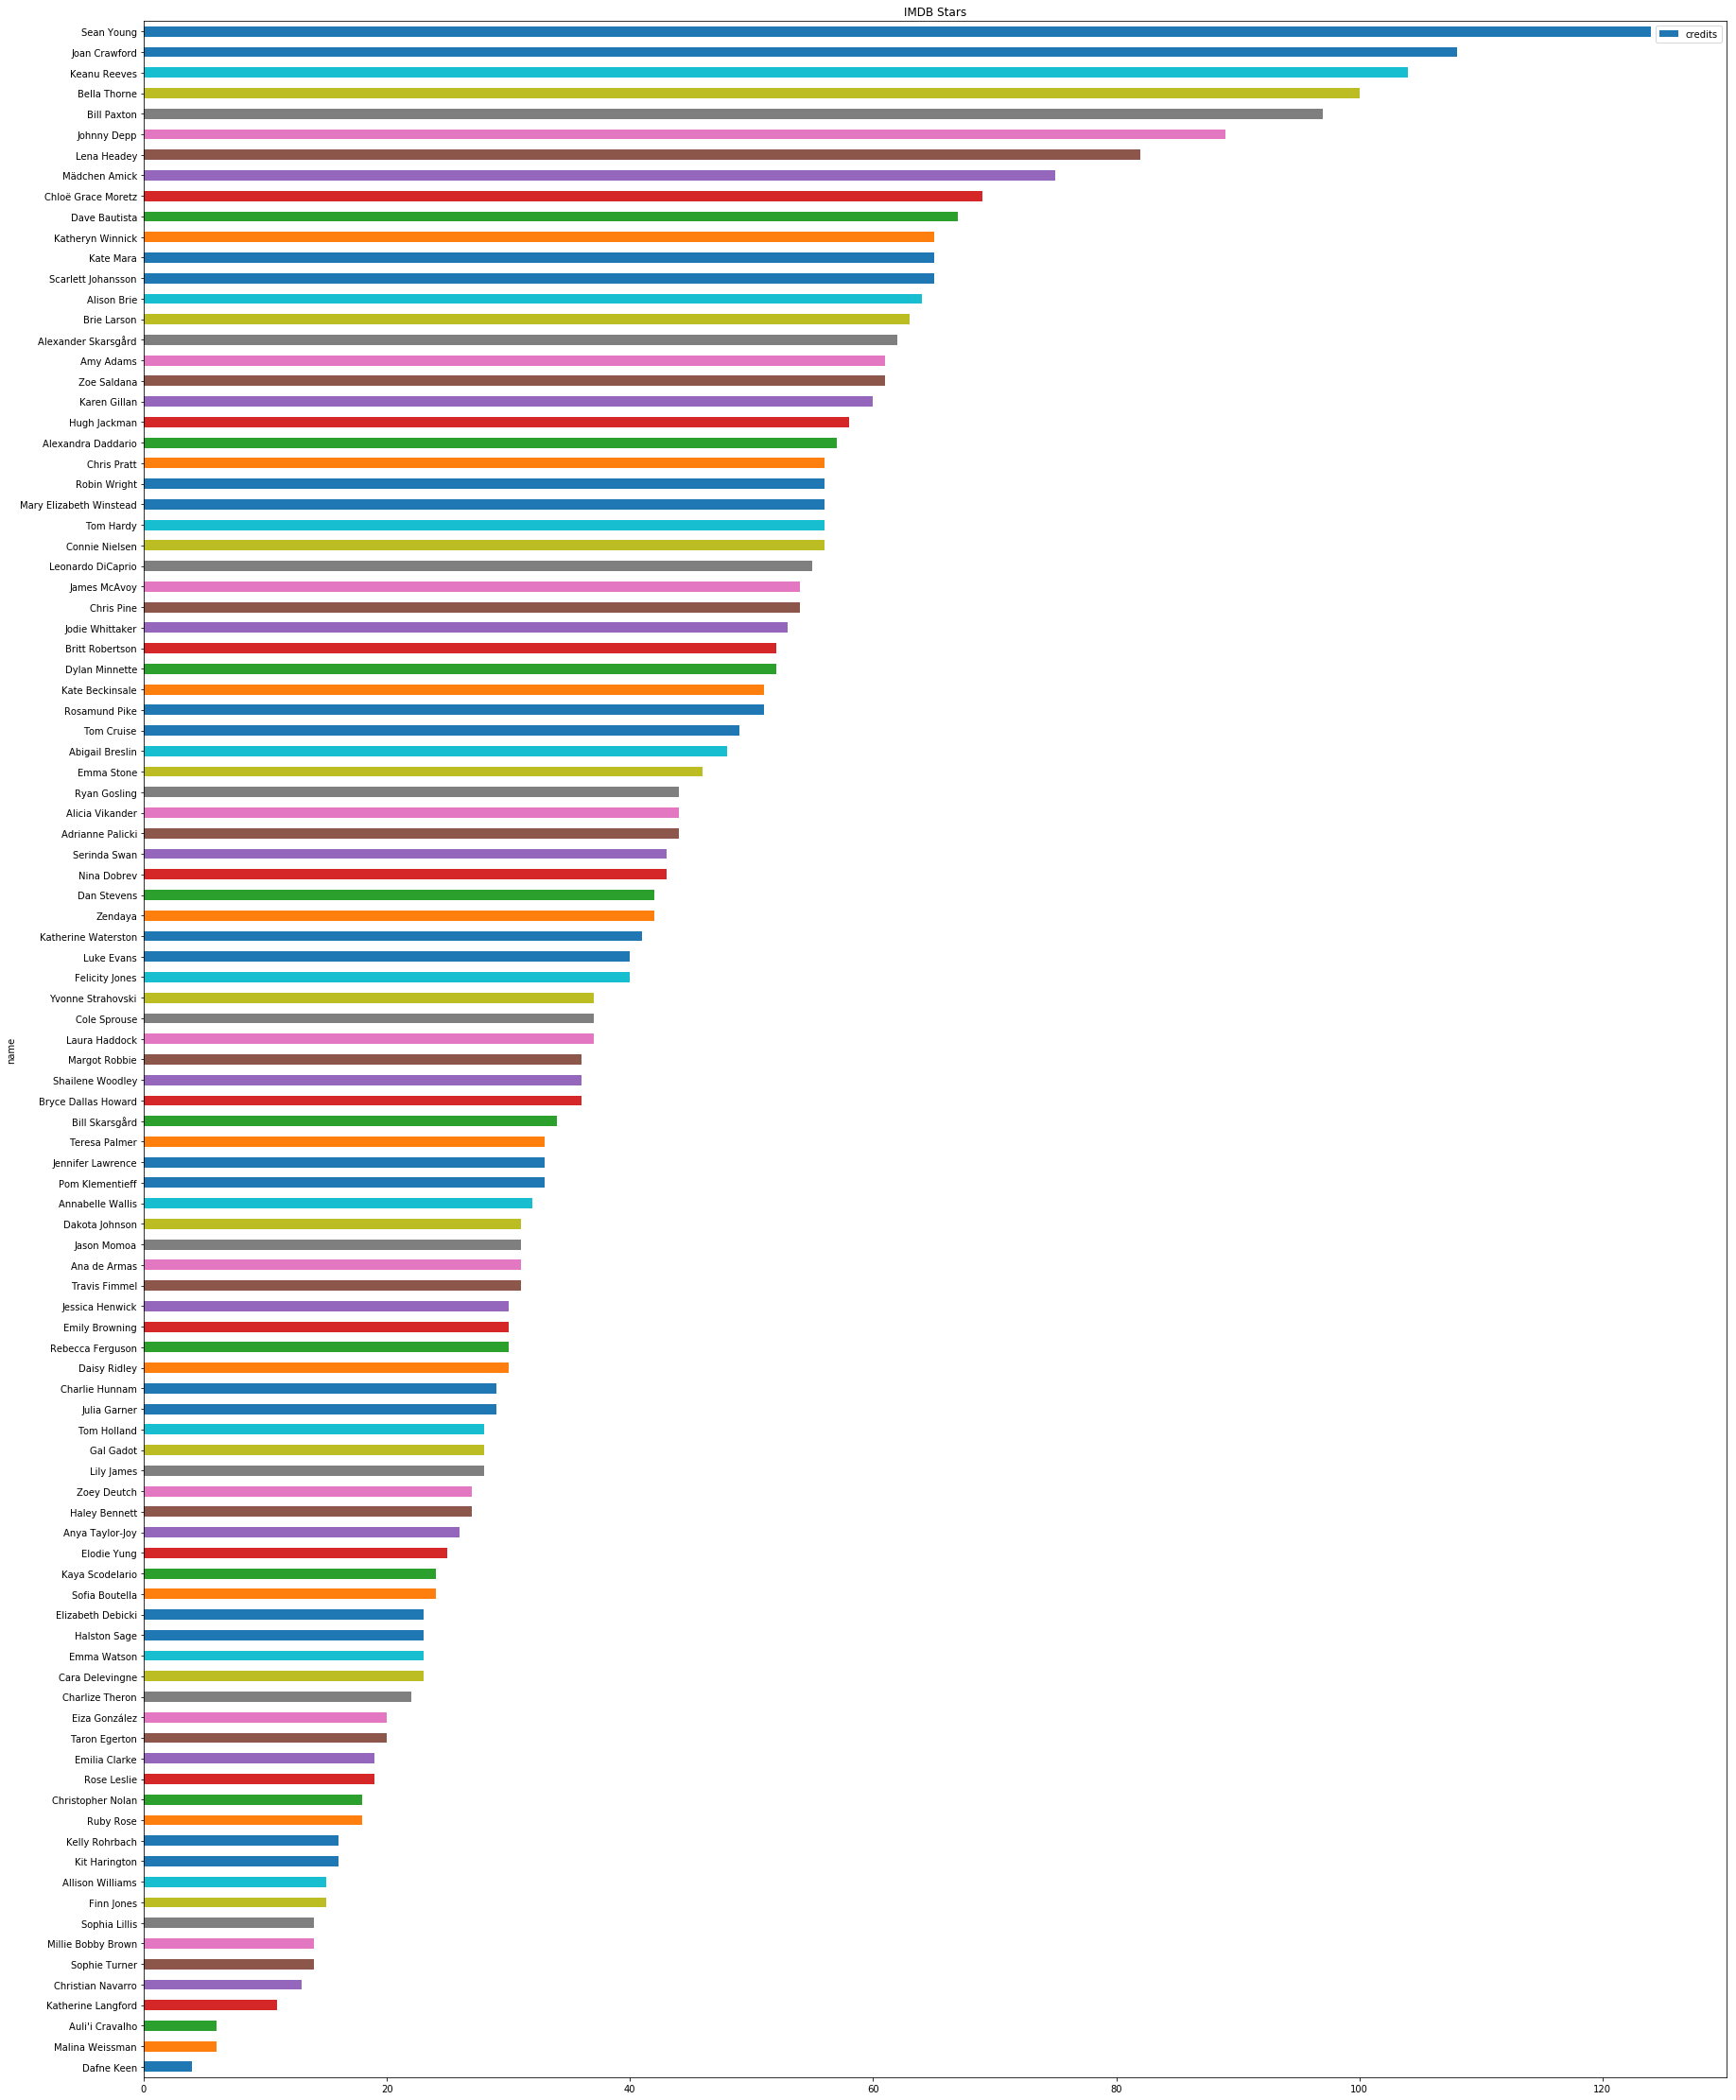

In [30]:
# your code here
star_df['credits']=pd.to_numeric(star_df['credits'])
star_df.sort_values('credits',inplace=True)


plt.rcParams["figure.figsize"] = (30,40)
star_df.plot(x='name',y='credits',kind='barh',title="IMDB Stars")


**2.9 [2 pts]** In 4 or fewer sentences, comment on what you see in the plots above.  Are there any surprises or patterns?  Please **have some fun** with this question.

I'm mainly surprised that I have no idea who Sean Young is. My dad is a big fan of Blade Runner, so I guess I probably don't need to bring this up too much.. Good to see Keanu Reeves is up there though, I think that shows that my analysis passes a quick quality check!
